## James Dietz, SQL Alchemy and Flask Homework #10 (aka HW8)

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# new Create the inspector and connect it to the engine.  I am going to need this information for the column join below.

inspector = inspect(engine)

In [11]:
#table names

inspector.get_table_names()

['measurement', 'station']

In [12]:
#columns from measurement table
columnsM = inspector.get_columns('measurement')
for column in columnsM :
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#columns from station table
columnsS = inspector.get_columns('station')
for column in columnsS:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [15]:
# looking at the data with a select

engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [16]:
#next piece in the puzzle is start with part of the query looking at the date ranges
session.query(Measurement.date).order_by(Measurement.date.desc()).all()

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [17]:
# Precipitation query by date range of previous year and ordering it by date
precipqry = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-24').order_by(Measurement.date).all()

precipqry

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipdf = pd.DataFrame(precipqry, columns=['date', 'precipitation'])
precipdf.set_index('date', inplace=True, )
precipdf.head(25)

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [19]:
#looking at data types to make sure that we dont have string data due to missing data [NaN]
precipdf.dtypes

precipitation    float64
dtype: object

In [20]:
#I chose to drop the missing data rows.
precipdf.dropna(inplace=True)
precipdf.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


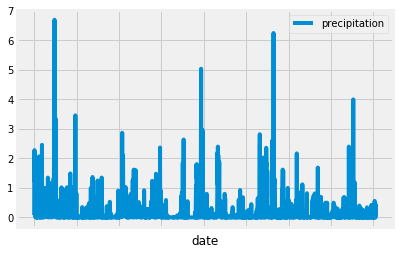

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
precipdf.plot()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#basic descriptive stats.  I eliminated all NaN rows and may have calculated my one year date range slightly differently than example so results may differ slightly.
precipdf.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.name)).all()

[(9)]

In [24]:
# First step in this requirement for me is to test doing a group by just to get the stations
stations = session.query(Measurement.station).group_by(Measurement.station).all()
stations


[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# So now I add a count by to count the rows in which the same station appears 

activestations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

In [26]:
activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [51]:
#temperature observations query based on the last twelve months for the most active station 
tobsqry = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-24').filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

tobsqry

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [30]:
#Creates a list of the data for the purpose of making a histogram.  This means only the temp readings are needed.
tobslist = [int(tobs[1]) for tobs in tobsqry]
tobslist

[77,
 80,
 80,
 75,
 73,
 78,
 77,
 78,
 80,
 80,
 78,
 78,
 78,
 73,
 74,
 80,
 79,
 77,
 80,
 76,
 79,
 75,
 79,
 78,
 79,
 78,
 78,
 76,
 74,
 77,
 78,
 79,
 79,
 77,
 80,
 78,
 78,
 78,
 77,
 79,
 79,
 79,
 79,
 75,
 76,
 73,
 72,
 71,
 77,
 79,
 78,
 79,
 77,
 79,
 77,
 78,
 78,
 78,
 78,
 77,
 74,
 75,
 76,
 73,
 76,
 74,
 77,
 76,
 76,
 74,
 75,
 75,
 75,
 75,
 71,
 63,
 70,
 68,
 67,
 77,
 74,
 77,
 76,
 76,
 75,
 76,
 75,
 73,
 75,
 73,
 75,
 74,
 75,
 74,
 75,
 73,
 75,
 73,
 73,
 74,
 70,
 72,
 70,
 67,
 67,
 69,
 70,
 68,
 69,
 69,
 66,
 65,
 68,
 62,
 75,
 70,
 69,
 76,
 76,
 74,
 73,
 71,
 74,
 74,
 72,
 71,
 72,
 74,
 69,
 67,
 72,
 70,
 64,
 63,
 63,
 62,
 70,
 70,
 62,
 62,
 63,
 65,
 69,
 77,
 70,
 74,
 69,
 72,
 71,
 69,
 71,
 71,
 72,
 72,
 69,
 70,
 66,
 65,
 69,
 68,
 68,
 68,
 59,
 60,
 70,
 73,
 75,
 64,
 59,
 59,
 62,
 68,
 70,
 73,
 79,
 75,
 65,
 70,
 74,
 70,
 70,
 71,
 71,
 71,
 69,
 61,
 67,
 65,
 72,
 71,
 73,
 72,
 77,
 73,
 67,
 62,
 64,
 67,
 66,
 81,


Text(0, 0.5, 'Frequency')

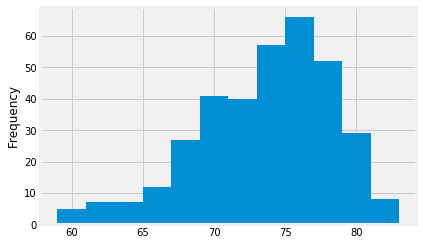

In [31]:
# Simple histogram useful in looking at the data....looks like a nice temperature range!
plt.hist(tobslist, bins=12)
plt.ylabel('Frequency')

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
newtrip = calc_temps('2011-02-28', '2011-03-05')
newtrip

[(61.0, 69.75510204081633, 75.0)]

Text(0.5, 1.0, 'Trip Avg Temp')

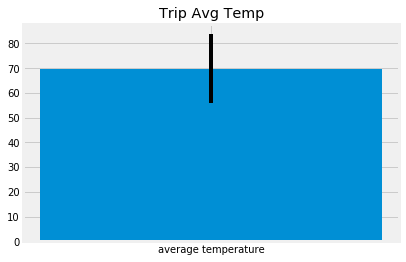

In [34]:
# rather uninspiring bar chart with avg temp using peak to peak range as error bar

x = ["average temperature"]
plt.bar(x, 69.75510204081633, yerr=14)
plt.title("Trip Avg Temp")

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [36]:
# creates a variable with the query features of interest:

Q = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

In [37]:
# Joins the station and measurement tables to query total precipitation per station for date period of interest for trip and displays other table column data including latitude and longitude and elevation along with station name and id
# Finally it formats it with textural printout

same_station = session.query(*Q).filter(Measurement.station == Station.station).\
    filter(Measurement.date <= '2011-03-05').\
    filter(Measurement.date >= '2011-02-28').\
    group_by(Measurement.station).\
    order_by(func.sum((Measurement.prcp)).desc()).all()


for record in same_station:
    (sta_sta, sta_name, sta_lat, sta_lon, sta_ele, mea_totprcp) = record
    print(f"The total precipation for the period 2011-02-28 thru 2011-03-5 for '{sta_name} ({sta_sta}) station' is '{mea_totprcp}'\
    The '{sta_name} station' is at '{sta_lat}' degree latitude and '{sta_lon}' degree longitude.  The elevation is '{sta_ele}'.")
    print("  ")
    print(" ")
    

The total precipation for the period 2011-02-28 thru 2011-03-5 for 'UPPER WAHIAWA 874.3, HI US (USC00518838) station' is '2.33'    The 'UPPER WAHIAWA 874.3, HI US station' is at '21.4992' degree latitude and '-158.0111' degree longitude.  The elevation is '306.6'.
  
 
The total precipation for the period 2011-02-28 thru 2011-03-5 for 'WAIHEE 837.5, HI US (USC00519281) station' is '2.23'    The 'WAIHEE 837.5, HI US station' is at '21.45167' degree latitude and '-157.84888999999998' degree longitude.  The elevation is '32.9'.
  
 
The total precipation for the period 2011-02-28 thru 2011-03-5 for 'WAIMANALO EXPERIMENTAL FARM, HI US (USC00519523) station' is '2.19'    The 'WAIMANALO EXPERIMENTAL FARM, HI US station' is at '21.33556' degree latitude and '-157.71139' degree longitude.  The elevation is '19.5'.
  
 
The total precipation for the period 2011-02-28 thru 2011-03-5 for 'KUALOA RANCH HEADQUARTERS 886.9, HI US (USC00514830) station' is '1.96'    The 'KUALOA RANCH HEADQUARTERS 886

In [38]:
# A check on if the [above] JOIN worked correctly was to replicate the precipitation query using one table [measurement] below:
# It checks as correct.

session.query(Measurement.station, func.sum(Measurement.prcp)).\
    filter(Measurement.date <= '2011-03-05').\
    filter(Measurement.date >= '2011-02-28').\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00513117', 1.44),
 ('USC00514830', 1.96),
 ('USC00516128', 1.45),
 ('USC00519281', 2.23),
 ('USC00519397', 1.38),
 ('USC00519523', 2.19),
 ('USC00511918', 0.63),
 ('USC00518838', 2.33),
 ('USC00517948', None)]

##  PREP FOR FLASK WORK


In [39]:
#/api/v1.0/precipitation
#Convert the query results to a Dictionary using date as the key and prcp as the value.
#Return the JSON representation of your dictionary.

precip_dict = dict(precipqry)
precip_dict

{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

In [41]:
#verifying last date for tobs query for python flask code
session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).first()


('2017-08-23', 81.0)

In [42]:
#Identifying earliest date for kicks
session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date).first()


('2010-01-01', 65.0)

In [63]:
# for flask requirement:  Proof of concxept:  When given the start only, calculate TMIN, TAVG, and TMAX 
# for all dates greater than and equal to the start date.

tobstart_query = session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= '2011-09-01').group_by(Measurement.date).\
    order_by(Measurement.date).all()

tobstart_query

[('2011-09-01', 73.0, 77.0, 81.0),
 ('2011-09-02', 75.0, 76.875, 79.0),
 ('2011-09-03', 72.0, 77.0, 80.0),
 ('2011-09-04', 77.0, 79.16666666666667, 81.0),
 ('2011-09-05', 70.0, 75.4, 78.0),
 ('2011-09-06', 66.0, 71.33333333333333, 75.0),
 ('2011-09-07', 64.0, 71.625, 76.0),
 ('2011-09-08', 66.0, 72.33333333333333, 77.0),
 ('2011-09-09', 68.0, 74.625, 79.0),
 ('2011-09-10', 70.0, 76.5, 79.0),
 ('2011-09-11', 71.0, 75.8, 79.0),
 ('2011-09-12', 70.0, 75.42857142857143, 85.0),
 ('2011-09-13', 68.0, 73.0, 77.0),
 ('2011-09-14', 69.0, 73.85714285714286, 77.0),
 ('2011-09-15', 73.0, 75.28571428571429, 79.0),
 ('2011-09-16', 73.0, 76.42857142857143, 80.0),
 ('2011-09-17', 70.0, 76.0, 79.0),
 ('2011-09-18', 71.0, 75.83333333333333, 78.0),
 ('2011-09-19', 72.0, 76.25, 82.0),
 ('2011-09-20', 72.0, 75.625, 80.0),
 ('2011-09-21', 72.0, 75.0, 79.0),
 ('2011-09-22', 70.0, 74.85714285714286, 78.0),
 ('2011-09-23', 71.0, 73.5, 76.0),
 ('2011-09-24', 76.0, 77.66666666666667, 79.0),
 ('2011-09-25', 72.0,

In [61]:
# Proof of concept in building a FLASK query:  making list of dictionaries using for loop

start_list = []
for date, mintobs, avgtobs, maxtobs in tobstart_query:
    start_dict = {}
    start_dict["date"] = date
    start_dict["minimum_temperature"] = mintobs
    start_dict["average_temperature"] = avgtobs
    start_dict["maximum_temperature"] = maxtobs
    start_list.append(start_dict)
     
start_list

[{'date': '2012-09-01',
  'minimum_temperature': 71.0,
  'average_temperature': 76.28571428571429,
  'maximum_temperature': 80.0},
 {'date': '2012-09-02',
  'minimum_temperature': 67.0,
  'average_temperature': 74.83333333333333,
  'maximum_temperature': 80.0},
 {'date': '2012-09-03',
  'minimum_temperature': 69.0,
  'average_temperature': 76.14285714285714,
  'maximum_temperature': 82.0},
 {'date': '2012-09-04',
  'minimum_temperature': 73.0,
  'average_temperature': 75.0,
  'maximum_temperature': 77.0},
 {'date': '2012-09-05',
  'minimum_temperature': 69.0,
  'average_temperature': 73.71428571428571,
  'maximum_temperature': 77.0},
 {'date': '2012-09-06',
  'minimum_temperature': 70.0,
  'average_temperature': 75.57142857142857,
  'maximum_temperature': 81.0},
 {'date': '2012-09-07',
  'minimum_temperature': 69.0,
  'average_temperature': 75.0,
  'maximum_temperature': 82.0},
 {'date': '2012-09-08',
  'minimum_temperature': 69.0,
  'average_temperature': 75.33333333333333,
  'maximum

## Optional Challenge Assignment

In [ ]:
# so I read and understand the instructions for the optional assignment but since it was optional, I
# decided to do it another way.
 

In [ ]:
# calculate the daily normals for trip--averages of the Min, Max, Avg Temps for all the years there are data for those dates.
# chose dates of 2-10 - 2/16.
# Wrote query to get the data
# Turned it into a dataframe to have it as a table
# Plotted it up.



In [88]:
#  created list of trip dates for for loop

mytripdatesmytripdates = ["02-10", "02-11", "02-12", "02-13", "02-14", "02-15", "02-16"]

print(mytripdates)

['02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16']


In [95]:
#put sqlalchemy query inside a for loop of dates and appended the average min, max, and avg.
mins = []
avgs = []
maxs = []

for date in mytripdates:
    
    weather_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
    for mintobs, avgtobs, maxtobs in weather_query:
        mins.append(mintobs)
        avgs.append(avgtobs)
        maxs.append(maxtobs)
        

In [96]:
mins

[56.0, 61.0, 60.0, 58.0, 62.0, 56.0, 59.0]

In [97]:
avgs

[68.41666666666667,
 69.25,
 69.15789473684211,
 70.36206896551724,
 70.89473684210526,
 70.28813559322033,
 70.48214285714286]

In [98]:
maxs

[76.0, 79.0, 78.0, 80.0, 79.0, 79.0, 76.0]

In [114]:
# for purpose of having data in dataframe, makes a dictionary from lists generated via query.

mytrip_dict = {'Date':mytripdates, 'Average_temp':avgs, 'Minimum_temp':mins, 'Maximum_temp':maxs}
mytrip_dict

{'Date': ['02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16'],
 'Average_temp': [68.41666666666667,
  69.25,
  69.15789473684211,
  70.36206896551724,
  70.89473684210526,
  70.28813559322033,
  70.48214285714286],
 'Minimum_temp': [56.0, 61.0, 60.0, 58.0, 62.0, 56.0, 59.0],
 'Maximum_temp': [76.0, 79.0, 78.0, 80.0, 79.0, 79.0, 76.0]}

In [116]:
# creates df from dictionary of historical average average-temp, min-temp, and max-temp for all years on dates below 
mytrip_df = pd.DataFrame(mytrip_dict)
mytrip_df

,Date,Average_temp,Minimum_temp,Maximum_temp
0,02-10,68.416667,56.0,76.0
1,02-11,69.250000,61.0,79.0
2,02-12,69.157895,60.0,78.0
3,02-13,70.362069,58.0,80.0
4,02-14,70.894737,62.0,79.0
5,02-15,70.288136,56.0,79.0
6,02-16,70.482143,59.0,76.0


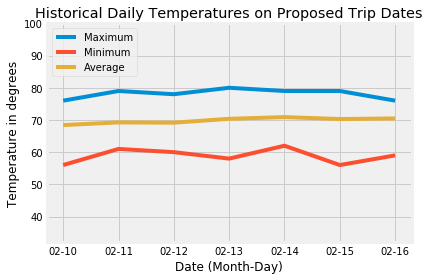

In [117]:
#plots data directly from lists generated from query.

plt.plot(mytripdates, maxs, mytripdates, mins, mytripdates, avgs)
plt.ylim((32,100))

plt.legend(['Maximum', 'Minimum', 'Average'], loc='upper left')
plt.title("Historical Daily Temperatures on Proposed Trip Dates")
plt.xlabel('Date (Month-Day)')
plt.ylabel('Temperature in degrees')

plt.tight_layout()


In [118]:
# Fin